In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from zipf import zipf_pmf, zipf_sample

In [2]:
# Parameters
N = 500
m = int(0.1 * N)  # 10% of N

# alphas lower that 1.01 have similar behavior as 1.01
alphas = [1.01, 1.1, 1.5, 2.0, 3.0]

## Probability mass function

In [3]:
# selected k values to display
ks_to_show = [1, 10, 100]

if m not in ks_to_show:
    ks_to_show.append(m)
    ks_to_show.sort()

# Compute probabilities
data = {}
for alpha in alphas:
    _, pmf = zipf_pmf(N, alpha)
    data[f"alpha={alpha}"] = [pmf[k-1] for k in ks_to_show]

df = pd.DataFrame(data, index=[f"k={k}" for k in ks_to_show])
print(df.T)

                 k=1      k=10      k=50         k=100
alpha=1.01  0.151416  0.014797  0.002912  1.446011e-03
alpha=1.1   0.191814  0.015236  0.002594  1.210262e-03
alpha=1.5   0.396357  0.012534  0.001121  3.963571e-04
alpha=2.0   0.608666  0.006087  0.000243  6.086664e-05
alpha=3.0   0.831909  0.000832  0.000007  8.319088e-07


## Compute cumulative probabilities (CDF)


In [4]:
data = {}
for alpha in alphas:
    _, pmf = zipf_pmf(N, alpha)
    cdf = np.cumsum(pmf)
    data[f"alpha={alpha}"] = [cdf[k-1] for k in ks_to_show]

df = pd.DataFrame(data, index=[f"k ≤ {k}" for k in ks_to_show])
print(df.T)

               k ≤ 1    k ≤ 10    k ≤ 50   k ≤ 100
alpha=1.01  0.151416  0.439449  0.669867  0.769716
alpha=1.1   0.191814  0.514090  0.734407  0.820583
alpha=1.5   0.396357  0.790866  0.923885  0.956360
alpha=2.0   0.608666  0.943292  0.989164  0.995160
alpha=3.0   0.831909  0.996237  0.999839  0.999960


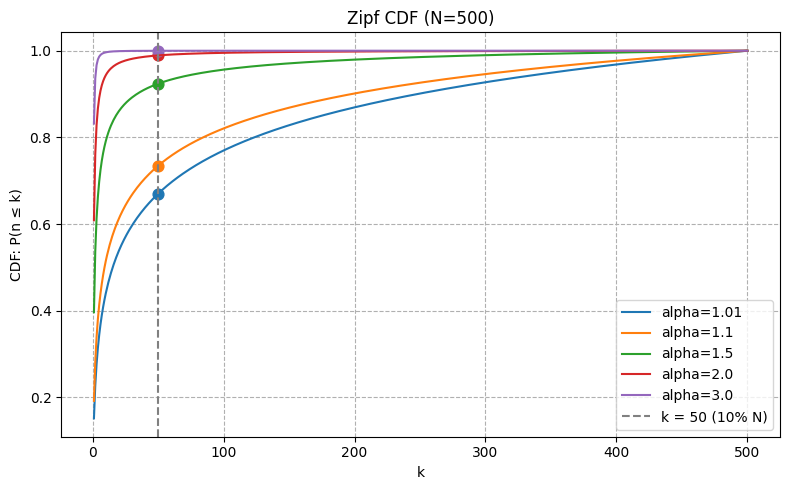

In [5]:
plt.figure(figsize=(8,5))

for alpha in alphas:
    ks, pmf = zipf_pmf(N, alpha)
    cdf = np.cumsum(pmf)
    plt.plot(ks, cdf, label=f"alpha={alpha}")
    # Mark the value at k = 0.1N
    plt.scatter(m, cdf[m-1], marker="o", s=60)

plt.axvline(m, color="gray", linestyle="--", label=f"k = {m} (10% N)")
plt.xlabel("k")
plt.ylabel("CDF: P(n ≤ k)")
plt.title(f"Zipf CDF (N={N})")
plt.legend()
plt.grid(True, ls="--")
plt.tight_layout()
plt.savefig("zipf_cdf.pdf")
plt.show()

The horizontal axis is the index k. 
The function is only defined at integer values of k. The connecting lines do not indicate continuity.

> Notice for example that for alpha=2 (and above), the probability of sampling a number k is concentrated in the first 10% of the items. Look at the histogram below to see how this translates into sampled values.

## Sampling from Zipf distribution

This section samples from a Zipf distribution and plots a histogram of the results.

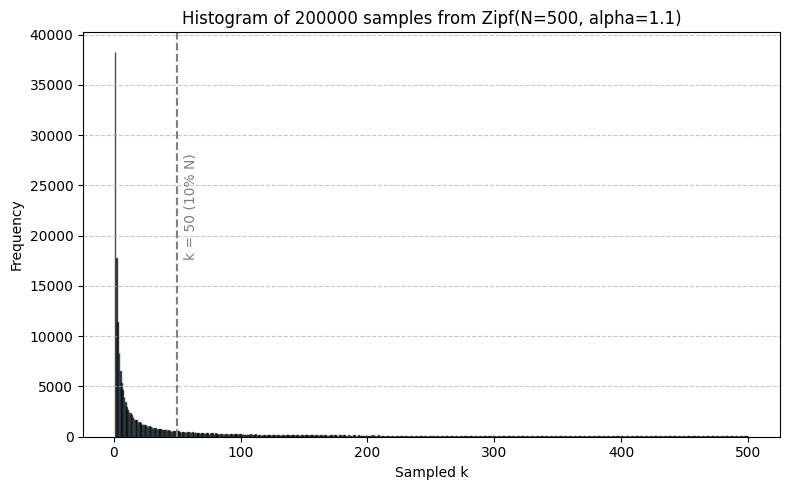

In [6]:
alpha = 1.1
size = 200000

# Draw x samples
samples = zipf_sample(N, alpha, size=size)
# print(samples)

# Plot histogram
bins=1000

plt.figure(figsize=(8,5))
plt.hist(samples, bins=bins, edgecolor="black", alpha=0.7)
plt.axvline(m, color="gray", linestyle="--", label=f"k = {m} (10% N)")
ymin, ymax = plt.ylim()
plt.text(m + 5, ymax * 0.7, f"k = {m} (10% N)", rotation=90, color="gray", va="top")

plt.xlabel("Sampled k")
plt.ylabel("Frequency")
plt.title(f"Histogram of {size} samples from Zipf(N={N}, alpha={alpha})")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("zipf_histogram.pdf")
plt.show()